# Analiza danych strumieniowych z użyciem uczenia maszynoweg

## Architektura

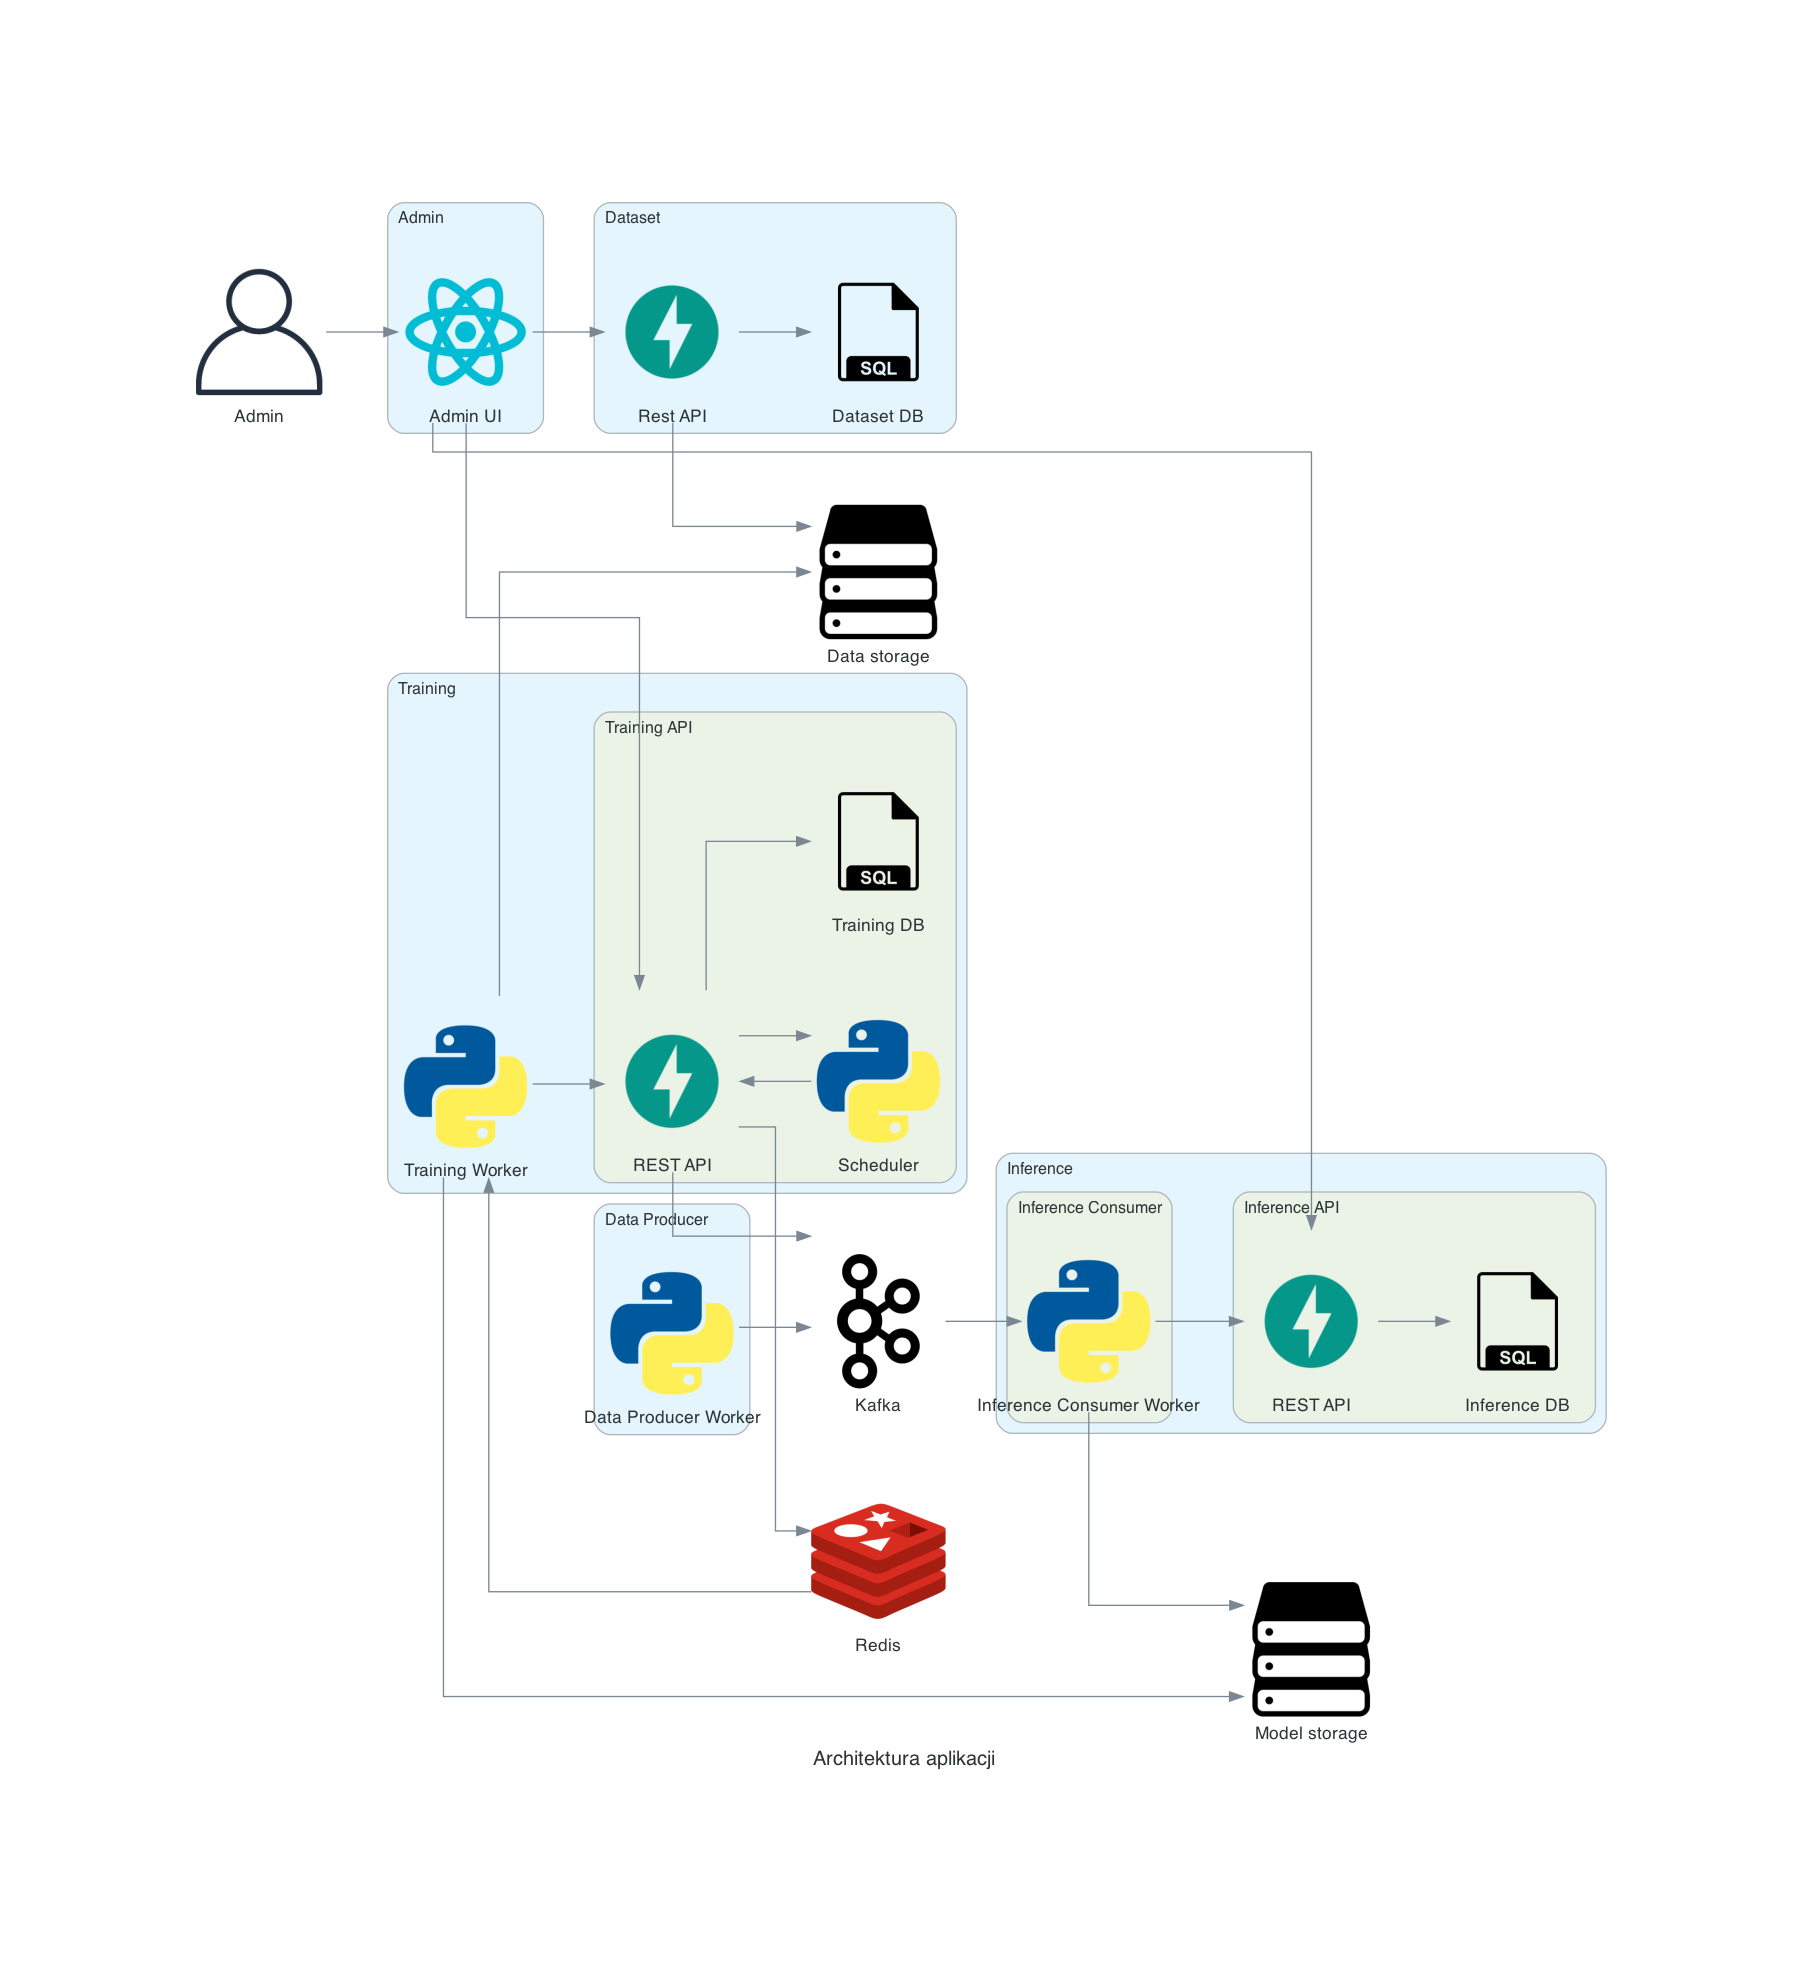

In [6]:
from diagrams import Cluster, Diagram
from diagrams.generic.database import SQL
from diagrams.generic.storage import Storage
from diagrams.onprem.client import Client, User, Users
from diagrams.programming.language import Python
from diagrams.programming.framework import FastAPI, React
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.queue import Kafka


with Diagram("Architektura aplikacji", filename="architecture", show=False) as diag:
    data_storage = Storage("Data storage")
    model_storage = Storage("Model storage")
    
    kafka = Kafka("Kafka")
    redis = Redis("Redis")
    
    user = User("Admin")
    
    with Cluster("Admin"):
        admin_ui = React("Admin UI")
    
    with Cluster("Dataset"):
        dataset_rest_api = FastAPI("Rest API") 
        dataset_db = SQL("Dataset DB")
    
    with Cluster("Training"):
        with Cluster("Training API"):
            training_rest_api = FastAPI("REST API")
            training_scheduler = Python("Scheduler")
            training_db = SQL("Training DB")
        training_worker = Python("Training Worker")

    with Cluster("Inference"):
        with Cluster("Inference API"):
            inference_rest_api = FastAPI("REST API")
            inference_db = SQL("Inference DB")
        with Cluster("Inference Consumer"):
            inference_consumer_worker = Python("Inference Consumer Worker")
    
    with Cluster("Data Producer"):
        data_producer_worker = Python("Data Producer Worker")
       
    user >> admin_ui
    dataset_rest_api >> dataset_db
    dataset_rest_api >> data_storage
    training_rest_api >> training_db
    training_rest_api >> redis
    training_rest_api >> training_scheduler
    training_scheduler >> training_rest_api 
    training_worker >> training_rest_api
    training_worker >> data_storage
    training_worker >> model_storage
    admin_ui >> training_rest_api
    admin_ui >> dataset_rest_api
    redis >> training_worker
    data_producer_worker >> kafka
    kafka >> inference_consumer_worker
    inference_rest_api >> inference_db
    inference_consumer_worker >> inference_rest_api
    admin_ui >> inference_rest_api
    training_rest_api >> kafka
    inference_consumer_worker >> model_storage
diag 


## Funkcjonalność

- CLI
  - konfiguracja harmonogramu trenowania
  - uruchamianie trenowania modelu na żądanie
  - dodawanie nowych zbiorów danych
- Zbiory danych
  - odczyt/zapis za pomocą REST API
  - możliwość pobrania najnowszego zbioru danych
- Harmonogram
  - możliwość konfiguracji za pomocą REST API 
  - uruchamianie trenowania wg konfiguracji
- Trenowanie
  - możliwość uruchomienia za pomocą REST API
  - zapis modelu w postaci binarnej na dysk
  - zapis metryk
- Metryki
  - możliwość wyświetlenia za pomocą UI
  - możliwość odczytu/zapisu za pomocą REST API